데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [9]:
import pandas as pd
import numpy as np
data=pd.read_csv("problem3_covid2.csv")

In [10]:
data

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0
...,...,...,...
11890,Vanuatu,2021-10-28,0.0
11891,Vanuatu,2021-10-29,0.0
11892,Vanuatu,2021-10-30,0.0
11893,Vanuatu,2021-10-31,0.0


- 나라별 누적 확진자 수 구하기(groupby 두번 사용)

인덱스가 같은 값끼리 묶음 groupby(level=0).cumsum()

In [17]:
target=data.groupby(['location', 'date']).sum().groupby(level=0).cumsum()
target.columns=['cumulative sum']
target.reset_index(inplace=True)

In [18]:
target

,location,date,cumulative sum
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
...,...,...,...
11890,Vanuatu,2021-10-28,5.0
11891,Vanuatu,2021-10-29,5.0
11892,Vanuatu,2021-10-30,5.0
11893,Vanuatu,2021-10-31,5.0


- acf 구하기(국가를 기준)

1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라

In [19]:
from scipy.spatial import distance
import statsmodels.api as sm

name=[]
name
for location in target.location.unique():
    v=sm.tsa.stattools.acf(target[target['location']==location]['cumulative sum'], nlags=50, fft=False)
    name.append([location]+list(v[1:]))
v=pd.DataFrame(name)
v

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Austria,0.986910,0.973895,0.961027,0.948347,0.935884,0.923563,0.911388,0.899286,0.887245,...,0.520420,0.509183,0.497960,0.486745,0.475543,0.464370,0.453267,0.442242,0.431334,0.420483
1,Bangladesh,0.993958,0.987757,0.981401,0.974895,0.968240,0.961439,0.954491,0.947394,0.940150,...,0.644404,0.633643,0.622824,0.611950,0.601019,0.590035,0.579005,0.567934,0.556820,0.545668
2,Bhutan,0.994586,0.989147,0.983590,0.977976,0.972226,0.966459,0.960636,0.954678,0.948797,...,0.700749,0.691193,0.681564,0.671847,0.662047,0.652165,0.642174,0.632091,0.621911,0.611642
3,Chile,0.992455,0.984846,0.977165,0.969415,0.961598,0.953711,0.945768,0.937768,0.929723,...,0.647890,0.638302,0.628672,0.618999,0.609285,0.599527,0.589710,0.579831,0.569911,0.559947
4,Colombia,0.993340,0.986596,0.979760,0.972838,0.965857,0.958820,0.951729,0.944587,0.937384,...,0.679471,0.670459,0.661382,0.652238,0.643029,0.633751,0.624406,0.615000,0.605532,0.596002
5,Costa Rica,0.991810,0.983535,0.975153,0.966751,0.958285,0.949791,0.941242,0.932571,0.923824,...,0.618037,0.608217,0.598396,0.588729,0.578986,0.569182,0.559436,0.549766,0.540130,0.530700
6,Dominica,0.985394,0.970488,0.955557,0.940502,0.925415,0.910434,0.894982,0.879564,0.864024,...,0.340212,0.325323,0.310219,0.295901,0.281439,0.266802,0.251947,0.237210,0.222798,0.210603
7,Dominican Republic,0.988748,0.977470,0.966112,0.954885,0.943612,0.932319,0.921053,0.909788,0.898637,...,0.590488,0.582152,0.573867,0.565637,0.557424,0.549236,0.541039,0.532845,0.524705,0.516596
8,Eswatini,0.991957,0.983655,0.975124,0.966366,0.957380,0.948162,0.938702,0.928984,0.919027,...,0.531118,0.517882,0.504646,0.491363,0.478050,0.464713,0.451352,0.438012,0.424679,0.411359
9,Ethiopia,0.990660,0.981181,0.971582,0.961856,0.952011,0.942059,0.931995,0.921820,0.911507,...,0.542607,0.530834,0.519123,0.507372,0.495701,0.484100,0.472584,0.461160,0.449834,0.438604


In [22]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NGULIM.TTF"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

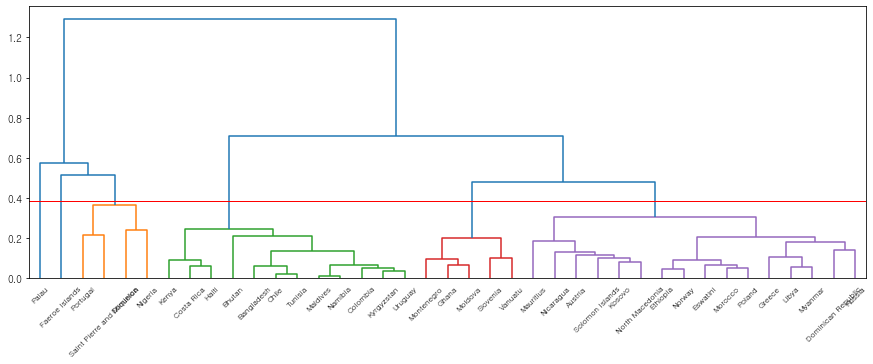

In [27]:
acf_df=v.set_index(0)
plt.figure(figsize=(15,5))
label=acf_df.index
dend1=sch.linkage(acf_df, method='average', metric='euclidean')
cutoff=0.3*max(dend1[:, 2])
dend_res1=sch.dendrogram(dend1, color_threshold=cutoff, labels=label)
plt.axhline(y=cutoff, color='r', linewidth=1)
plt.show()